# Predict 30-day Hospital Readmission for Diabetic Patients

## Data Description (UCI Repository)

**Diabetes 130-US hospitals for years 1999-2008 Data Set**

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.  
(1)	It is an inpatient encounter (a hospital admission).  
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.  
(3)	The length of stay was at least 1 day and at most 14 days.   
(4)	Laboratory tests were performed during the encounter.  
(5)	Medications were administered during the encounter.  
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


**Goal:** Predict the 30day Readmission within Hospital Discharge



### *Download DataSet*

In [108]:
downloadData = True # If already done, turn downloadData = False 
if downloadData == True:
  indrive = False
  if indrive == True:
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip -P "/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions"
    !unzip "/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/dataset_diabetes.zip" -d "/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/"
    !ls "/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions"
  else: #incloud google server
    !rm -rf dataset_diabetes.*
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
    !unzip dataset_diabetes.zip >/dev/null 2>&1
    !ls 

--2019-07-25 10:30:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3347213 (3.2M) [application/x-httpd-php]
Saving to: ‘/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/dataset_diabetes.zip’

dataset_diabetes.zi 100%[===================>]   3.19M  6.39MB/s    in 0.5s    

2019-07-25 10:30:32 (6.39 MB/s) - ‘/content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/dataset_diabetes.zip’ saved [3347213/3347213]

Archive:  /content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/dataset_diabetes.zip
  inflating: /content/drive/My Drive/Colab Notebooks/ai-labs/diabetes-hopital-readmissions/dataset_diabetes/diabetic_data.csv  
  inflating: /content/drive/My Drive/Colab 

## Populating namespaces

In [70]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import tree
# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Utils
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
# Interpretability
!pip install anchor_exp
from anchor import anchor_tabular
# display
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
ai_project = '.' #"/content/drive/My Drive/Colab Notebooks/ai-labs/malaria-diagnosis"
diabetes_data_dir = os.path.join(ai_project,'dataset_diabetes')
!ls dataset_diabetes
training_path = os.path.join(ai_project,'train')
testing_path = os.path.join(ai_project,'test')

diabetic_data.csv  IDs_mapping.csv


## Prepare dataset

In [25]:
data = pd.read_csv(os.path.join(diabetes_data_dir,'diabetic_data.csv'))
print(data.shape)
data.sample(5)

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
40194,124899354,24519465,AfricanAmerican,Female,[60-70),?,2,22,1,4,MC,InternalMedicine,41,1,29,0,0,0,820,250,402,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
34844,108587304,7205256,?,Male,[60-70),?,2,1,1,1,HM,Cardiology,36,5,5,0,0,0,414,250,V15,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
29724,96795792,62988489,Caucasian,Female,[50-60),?,6,1,17,7,?,InternalMedicine,66,0,24,0,0,2,584,428,427,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30
48025,147060648,47937690,Caucasian,Female,[70-80),?,2,1,1,6,?,Family/GeneralPractice,59,0,17,0,0,0,491,710,401,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
76591,231252996,98026524,Caucasian,Female,[50-60),?,1,1,7,5,MC,?,76,1,18,0,1,0,584,250.82,585,9,None,None,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


What are the main issues related to these dataset:

*   Categorical data
*   Missing data with **?** or **None** value
*   Many variables to analyse

*   ...



### First, analyse the target col=readmitted

3


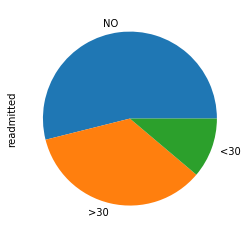

In [26]:
print(len(data.readmitted.value_counts()))
data["readmitted"].value_counts().plot(kind='pie')

### Second, descriptive analysis of variables

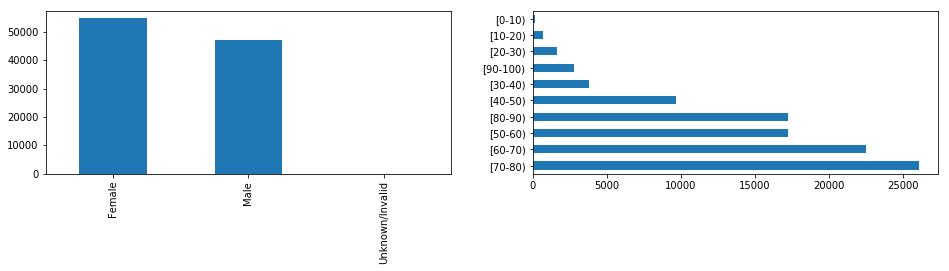

In [17]:
# Socio-demographics
plt.figure(figsize=(16,3))
plt.subplot(121)
data.gender.value_counts().plot(kind="bar") 
plt.subplot(122)
data.age.value_counts().plot(kind="barh")

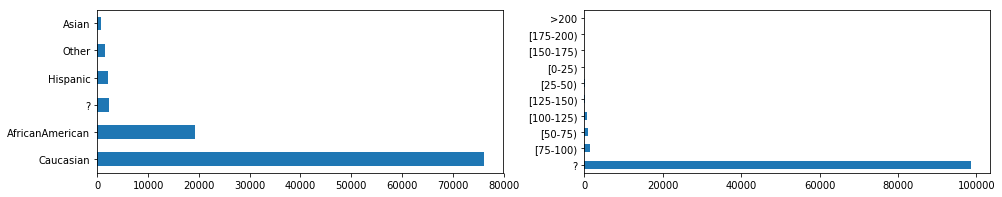

In [18]:
plt.figure(figsize=(16,3))
plt.subplot(121)
data.race.value_counts().plot(kind="barh")
plt.subplot(122)
data.weight.value_counts().plot(kind="barh")  

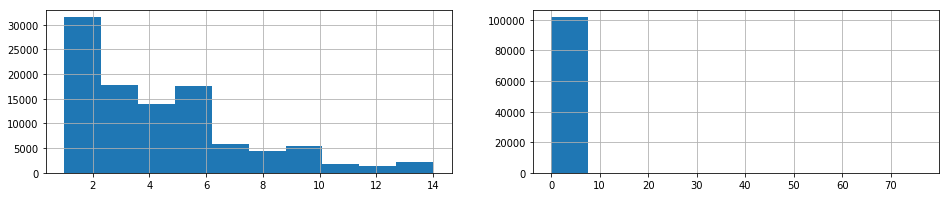

In [19]:
# Hospital visits
plt.figure(figsize=(16,3))
plt.subplot(121)
data.time_in_hospital.hist()
plt.subplot(122)
data.number_emergency.hist()

In [0]:
# Medical condition
#<TODO>Descriptive analysis of some variables</TODO>
diabetesMed
number_diagnoses	
num_procedures	
medical_specialty
diag_1	diag_2	diag_3

In [0]:
# Medication
#<TODO>Descriptive analysis of some variables</TODO>
num_medications


In [0]:
# Labtests
#<TODO>Descriptive analysis of some variables</TODO>
num_lab_procedures

In [0]:
##<TODO>Descriptive analysis of some variables</TODO>

### Preprocessing: Data crunching, Handle missing data, ...

In [27]:
# From the descriptive analysis, some variables seem less informative (invariants)
vars_less_infos = ["weight","examide", "citoglipton","glyburide-metformin","glipizide-metformin",
                   "glipizide-metformin","metformin-rosiglitazone","metformin-pioglitazone"]
print('vars_less_infos (not extaustive):',vars_less_infos)

# IDs 
vars_ids = [colname for colname, serie in data.iteritems() if serie.name.endswith('_id')]
print('vars_ids:',vars_ids)

# Let's then remove them
data = data.drop(vars_less_infos+vars_ids , axis=1)
data.shape

vars_less_infos (not extaustive): ['weight', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone']
vars_ids: ['encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']


(101766, 39)

In [28]:
data.head()

,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glimepiride-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,Ch,Yes,NO


## Feature engineering¶

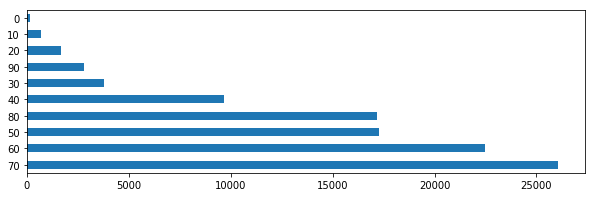

In [29]:
# Replace age str_Interval by lower numeric bound
data['age_group'] = data.age.replace({'[0-10)':0,
                                      '[10-20)':10,
                                      '[20-30)':20,
                                      '[30-40)':30,
                                      '[40-50)':40,
                                      '[50-60)':50,
                                      '[60-70)':60,
                                      '[70-80)':70,
                                      '[80-90)':80,
                                      '[90-100)':90})
data['age_group'].value_counts().plot(kind='barh', figsize=(10, 3))
data.drop('age', axis=1, inplace=True)

In [30]:
# Loop on data to create data_dumies using get_dummies() to convert categorical variable into dummy/indicator variables
data_dumies = pd.DataFrame()
for colname, serie in data.iteritems():
    if serie.dtype.name == 'object' and not serie.name.startswith('diag'):  # KEEP diag cols for more complete and deep analysis
        data_change = pd.get_dummies(data[colname] , prefix = colname)
        data_dumies = pd.concat([data_dumies,data_change] , axis = 1)
print(data_dumies.shape)
data_dumies.head()

(101766, 174)


,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,payer_code_?,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glimepiride

In [0]:
# OneHotEncoding is an alternative to dummies. Feel experiment to test it
# (https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417)

In [31]:
# Collect numerical data in dataframe data_num
data_num = data
for colname, serie in data.iteritems():
    if serie.dtype.name == 'object':
        data_num = data_num.drop(colname , axis=1)
print(data_num.shape)
data_num.head()

(101766, 10)


,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group
0,8222157,1,41,0,1,0,0,0,1,0
1,55629189,3,59,0,18,0,0,0,9,10
2,86047875,2,11,5,13,2,0,1,6,20
3,82442376,2,44,1,16,0,0,0,7,30
4,42519267,1,51,0,8,0,0,0,5,40


In [32]:
# Concatenate dummies and data_num
data_prep= pd.concat([data_num,data_dumies] , axis = 1) 
print(data_prep.shape)
data_prep.head()

(101766, 184)


,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,payer_code_?,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Stea

Conclusion: dimension and sparsity

## Machine Learning: Binary Classification Problem

30day Readmission rate:  11.159915885462729


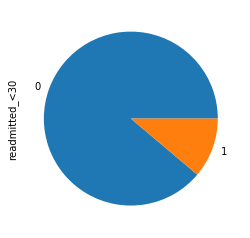

In [33]:
# Remember the Goal: Predict 30day Hospital Readmission within Discharge
# Compute the readmission rate
rea_dict = data_prep["readmitted_<30"].value_counts()
print("30day Readmission rate: ", 100.*rea_dict[1]/(rea_dict[0]+rea_dict[1]))
rea_dict.plot(kind='pie')

=> Unbalanced classes

In [0]:
# X: features dataframe and y target serie
X = data_prep.drop(['patient_nbr', 'readmitted_<30','readmitted_>30', 'readmitted_NO'], axis=1)
y = data_prep["readmitted_<30"]
X_columns = X.columns.values
y=y.astype('int')

### Split Data into Training, Testing and Validation sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(81412, 180) (81412,)
(20354, 180) (20354,)


### Machine Learning: Train, Test & Evaluate

In [0]:
# Fitting Random Forest to the Training set
clf= RandomForestClassifier(n_estimators=100, max_depth = 6, random_state = 42)
clf.fit(X_train, y_train)
pred_proba_train = clf.predict_proba(X_train)[:,1]
pred_proba_test = clf.predict_proba(X_test)[:,1]

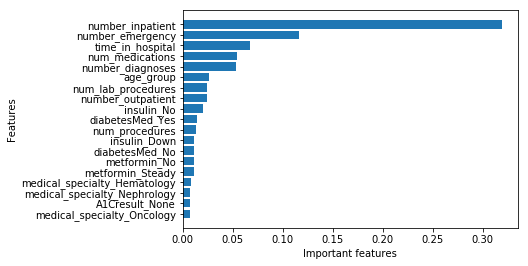

In [38]:
imp_feat, names0 = zip(*sorted(zip(clf.feature_importances_, X_train.columns)))
topN=19
imp_feat, names = imp_feat[len(names0)-topN:], names0[len(names0)-topN:]
plt.barh(range(len(names)), imp_feat) #, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel("Important features")
plt.ylabel("Features")
plt.show()

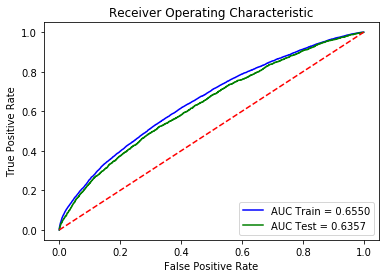

In [39]:
def roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test):
    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(
        y_train, pred_proba_train)
    roc_auc_train = metrics.auc(false_positive_rate_train,
                                true_positive_rate_train)

    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(
        y_test, pred_proba_test)
    roc_auc_test = metrics.auc(false_positive_rate_test,
                               true_positive_rate_test)

    plt.title('Receiver Operating Characteristic')
    plt.plot(
        false_positive_rate_train,
        true_positive_rate_train,
        'b',
        label='AUC Train = %0.4f' % roc_auc_train)
    plt.plot(
        false_positive_rate_test,
        true_positive_rate_test,
        'g',
        label='AUC Test = %0.4f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test)

**Conclusion:** So far, we create the machine learning pipeline to predict hospital readmission. The main stage of this pipeline are: **preprocessing, features engineering, modeling and performance assessment**. Using RandomForest with the extracted features, we end-up a **baseline performance** to be improve.

## Exercice: Performance improvement

1.    Try more **descrisptive analysis** and **visualisation** for better understanding the data: correlation study, identify most informative variables, ...etc.

2.   **Features engineering** is one of the most impactful task to improve ML performance: extract other features and assess their performance on the model.

3.   **Benchmarck** some others **Machine Learning algorithms** such that Gradient Boosting, Support Vector Machine, Neural Networks

**Conclusion:** key take aways


## Interpretability

In [101]:
# https://github.com/marcotcr/anchor
class_names = ["not_readmitted", "readmitted"]
feature_names = list(names) # Important variable 
# Retain on important features
X_train, X_test = X[feature_names], X_test[feature_names]
y_train, y_test = y, y_test
clf.fit(X_train, y_train)
print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [107]:
# convert input dataframe to numpy format (required by Anchors algorithm)
X_trn = X_train.values
X_tst = X_test.values
# Instanciate of Anchor explainer
explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=class_names,
    feature_names=feature_names,
    data=X_train.values,
    categorical_names={},
)
# Fit Anchor using training and testing data (numpy format)
explainer.fit(X_trn, y_train, X_tst, y_test)#, discretizer="decile")

def predict_fn(x):
    # perturb x using anchor and get the local prediction from the ML
    return clf.predict(explainer.encoder.transform(x))
  
label = 1
i = np.random.choice(np.nonzero(y_test.to_numpy() == label)[0])
print(i)
prob = clf.predict_proba(X_test)
print('features:', feature_names)
print('true label:', class_names[y_test.to_numpy()[i]])
print('proba:', prob[i])
print('Prediction: ', explainer.class_names[predict_fn(X_tst[i,:].reshape(1, -1))[0]])
exp = explainer.explain_instance(X_tst[i,:], clf.predict, threshold=0.95, max_anchor_size=2)
print(f'Coverage: {exp.coverage()}')
print(f'Precision: {exp.precision()}')
exp.show_in_notebook()
#prediction_intrepretation_html = "trust{}%_ml_i-{}_p-{}_dt-{}.html".format(
#    round(100 * exp.precision(), 0), i, patient, s_dt
#)
#print("=> View: {}".format(prediction_intrepretation_html))
#exp.save_to_file(prediction_intrepretation_html)

Output hidden; open in https://colab.research.google.com to view.